In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/ecg_autoencoder_dataset.csv", on_bad_lines='skip')

In [ ]:
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,-0.36380791,-0.49195659,-0.42185509,-0.30920086,-0.4959387,-0.34211867,-0.35533627,-0.36791303,-0.31650279,-0.41237405,-0.47167181,-0.41345783,-0.36461703,-0.44929829,-0.47141866,-0.42477658,-0.46251673,-0.55247236,-0.47537519,-0.6942,-0.7018681,-0.59381178,-0.66068415,-0.71383066,-0.76980688,-0.67228161,-0.65367605,-0.63940562,-0.55930228,-0.59167032,...,1.2581791,1.4337887,1.7005334,1.9990431,2.1253411,1.9932907,1.9322463,1.7974367,1.5222839,1.2511679,0.99873034,0.48372242,0.023132292,-0.19491383,-0.22091729,-0.24373668,-0.25469462,-0.29113555,-0.25649034,-0.22787425,-0.32242276,-0.28928586,-0.31816951,-0.36365359,-0.39345584,-0.26641886,-0.25682316,-0.28869399,-0.16233755,0.16034772,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.196807,-0.174795,-0.208833,-0.210754,-0.100485,0.197446,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456

In [ ]:
print("Shape : " ,df.shape)

Shape :  (8662, 141)


In [ ]:
features = df.iloc[:,:-1].values
target = df.iloc[:,-1].values

# Identify rows where target is NaN
nan_in_target = np.isnan(target)

# Remove rows with NaN in target from both features and target
features = features[~nan_in_target]
target = target[~nan_in_target]


In [ ]:
print(features[0])
print(target[0])

[-1.1008778e+00 -3.9968398e+00 -4.2858426e+00 -4.5065789e+00
 -4.0223767e+00 -3.2343676e+00 -1.5661258e+00 -9.9225766e-01
 -7.5467971e-01  4.2321173e-02  1.4895093e-01  1.8352707e-01
  2.9487608e-01  1.9023267e-01  2.3557500e-01  2.5348712e-01
  2.2174240e-01  5.0233259e-02  1.7804214e-01  1.3956318e-01
  4.6794433e-02  4.3007139e-02  1.0654432e-01  1.2654003e-02
  3.9948540e-03  4.5724179e-02 -4.5999362e-02 -7.2666959e-02
 -7.1077909e-02 -1.5386649e-01 -2.2725443e-01 -2.4926970e-01
 -2.5348935e-01 -3.3283516e-01 -2.6432996e-01 -3.4582525e-01
 -3.1078107e-01 -3.3415978e-01 -3.0617791e-01 -1.7456252e-01
 -2.0616017e-01 -2.2447967e-01 -4.8683931e-02 -1.9621159e-02
  9.4805186e-02  1.1678639e-01  1.8518592e-01  2.3052577e-01
  1.3802707e-01  2.4442554e-01  2.7169477e-01  2.5900331e-01
  2.6920166e-01  1.2706463e-01  2.0207339e-01  2.5598343e-01
  1.5311526e-01  2.1021583e-01  1.9108187e-01  1.9092702e-01
  2.1051006e-01  2.0710764e-01  2.0488835e-01  2.0086474e-01
  3.4691963e-01  3.48001

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.2, stratify=target,random_state=42
)

print("Training features shape : ", X_train.shape)
print("Training labels shape : ", Y_train.shape)
print("Test features shape : " , X_test.shape)
print("Test labels shape : " , Y_test.shape)

Training features shape :  (6923, 140)
Training labels shape :  (6923,)
Test features shape :  (1731, 140)
Test labels shape :  (1731,)


In [ ]:
x_train_normal = X_train[Y_train == 1]
print("Normal class training samples : ", x_train_normal.shape)

Normal class training samples :  (3767, 140)


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_normal)
x_test_scaled = scaler.transform(X_test)

In [ ]:
class AutoEncoder(models.Model):
  def __init__(self, output_units):
      super().__init__()

      self.encoder = models.Sequential([
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dense(8, activation='relu')
      ])

      self.decoder = models.Sequential([
          layers.Dense(16,activation='relu'),
          layers.Dense(32,activation='relu'),
          layers.Dense(64,activation='relu'),
          layers.Dense(output_units, activation='sigmoid')
      ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle',metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_scaled, x_test_scaled),
    verbose=1
)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0071 - mse: 0.0157 - val_loss: 0.0094 - val_mse: 0.0214
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mse: 0.0070 - val_loss: 0.0089 - val_mse: 0.0201
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0025 - mse: 0.0056 - val_loss: 0.0086 - val_mse: 0.0196
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - mse: 0.0050 - val_loss: 0.0085 - val_mse: 0.0192
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - mse: 0.0048 - val_loss: 0.0083 - val_mse: 0.0187
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mse: 0.0042 - val_loss: 0.0077 - val_mse: 0.0173
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0016 - mse: 0.0035 - val_loss: 0.0072 - val_mse: 0.0163
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mse: 0.0034 - val_loss: 0.0070 - val_mse: 0.0159
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

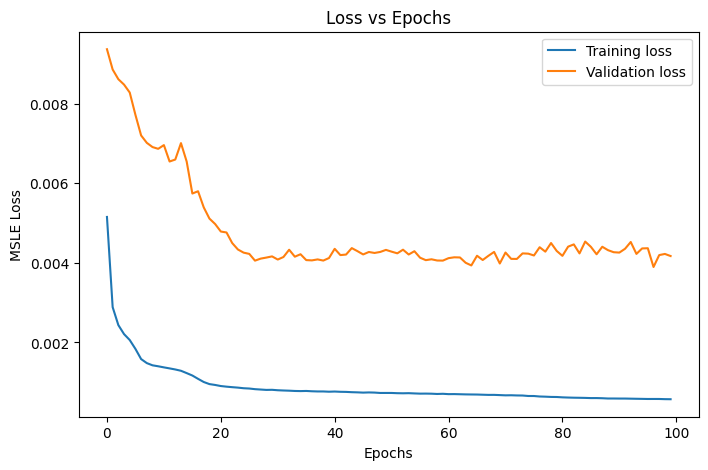

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSLE Loss")
plt.legend()
plt.show()

In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstructions , x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy() + np.std(reconstruction_errors.numpy()))
  return threshold

threshold = find_threshold(model, x_train_scaled)
print("Anomaly Detection Threshold : " ,threshold)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Anomaly Detection Threshold :  0.0015512467727967353


In [ ]:
reconstructions = model.predict(x_test_scaled)
reconstruction_errors = tf.keras.losses.msle(reconstructions, x_test_scaled)
y_pred = np.where(reconstruction_errors > threshold,0,1)

accuracy = accuracy_score(Y_test,y_pred)
print("Model Accuracy : ", accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model Accuracy :  0.9711149624494512


In [ ]:
df_2 = pd.read_csv("/content/creditcard.csv")

In [ ]:
df_2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print("DF shape : " , df_2.shape)

DF shape :  (217924, 31)


In [ ]:
# Step 3: Feature and target split
features = df_2.drop(['Class', 'Time'], axis=1).values
target = df_2['Class'].values

# Identify rows where target is NaN
nan_in_target = np.isnan(target)

# Remove rows with NaN in target from both features and target
features = features[~nan_in_target]
target = target[~nan_in_target]


In [ ]:
# Step 4: Split dataset into train/test
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (174338, 29)
Test data shape: (43585, 29)


In [ ]:
x_train[0]

array([-1.61936104e+00, -4.08433708e-02,  1.14447773e+00, -2.28460109e-01,
        2.21359601e-01, -1.48437339e+00,  1.54975289e-01,  3.86437087e-01,
       -4.77289084e-01, -9.73604260e-01, -7.87438443e-01, -2.04514119e-01,
       -6.42923689e-01,  6.62582235e-01,  4.63335184e-01,  6.52165759e-01,
       -4.41622439e-01, -2.69578760e-01, -6.88467014e-01,  1.15857183e-01,
       -1.04685320e-02, -7.30328304e-01,  1.51522409e-01,  3.62780486e-01,
       -3.39521994e-01,  6.27890477e-03, -8.13464968e-02, -9.12835283e-02,
        5.79600000e+01])

In [ ]:
x_train_normal = x_train[y_train == 0]
print("Normal class training samples:", x_train_normal.shape)

Normal class training samples: (174016, 29)


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_normal)
x_test_scaled = scaler.transform(x_test)

In [ ]:
class AutoEncoder(models.Model):
  def __init__(self, output_units):
      super().__init__()

      self.encoder = models.Sequential([
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dense(8, activation='relu')
      ])

      self.decoder = models.Sequential([
          layers.Dense(16,activation='relu'),
          layers.Dense(32,activation='relu'),
          layers.Dense(64,activation='relu'),
          layers.Dense(output_units, activation='sigmoid')
      ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle',metrics=['mse'], optimizer='adam')

In [ ]:
history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_scaled, x_test_scaled),
    verbose=1
)


Epoch 1/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 6.1240e-04 - mse: 0.0013 - val_loss: 5.3683e-04 - val_mse: 0.0012
Epoch 2/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 5.1841e-04 - mse: 0.0011 - val_loss: 4.9279e-04 - val_mse: 0.0011
Epoch 3/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 4.8158e-04 - mse: 0.0011 - val_loss: 4.7146e-04 - val_mse: 0.0011
Epoch 4/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 4.5461e-04 - mse: 0.0010 - val_loss: 3.8004e-04 - val_mse: 8.5238e-04
Epoch 5/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 3.4622e-04 - mse: 7.7768e-04 - val_loss: 3.1407e-04 - val_mse: 7.0725e-04
Epoch 6/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 2.8296e-04 - mse: 6.3810e-04 - val_loss: 2.6982e-04 - val_mse: 6.1428e-04
Epoch 7/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 2.5757e-04 - mse: 5.8366e-04 - val_loss: 2.5559e-04 - val_mse: 5.8470e-04
Epoch 8/10
5438/5438 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 2.4429

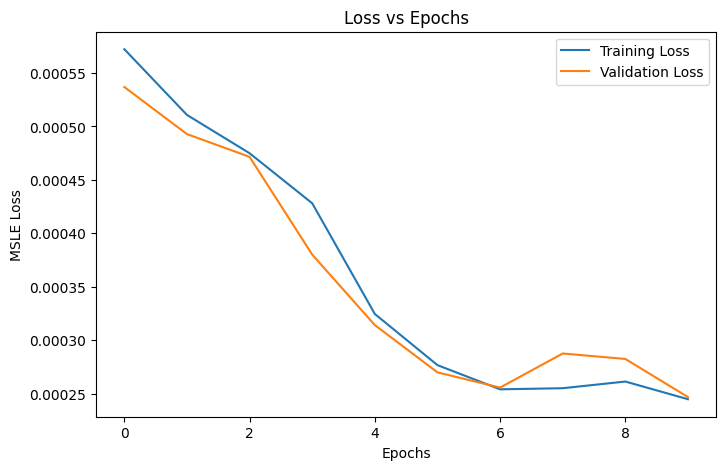

In [ ]:
# Step 9: Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSLE Loss")
plt.legend()
plt.show()


In [ ]:
# Step 10: Compute threshold based on reconstruction error
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
    return threshold

threshold = find_threshold(model, x_train_scaled)
print("Threshold for anomaly detection:", threshold)


5438/5438 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
Threshold for anomaly detection: 0.0007436540697863428


In [ ]:
# Step 11: Predict anomalies
reconstructions = model.predict(x_test_scaled)
reconstruction_errors = tf.keras.losses.msle(reconstructions, x_test_scaled)
y_pred = np.where(reconstruction_errors > threshold, 1, 0)  # 1 = anomaly (fraud), 0 = normal


1363/1363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
# Step 12: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9536308362968912


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers, optimizers
import tensorflow as ts
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/creditcard.csv", na_filter=True)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
features = df.iloc[:,:-1].values
target = df.iloc[:,-1].values

nan_in_target = np.isnan(target)
features = features[~nan_in_target]
target = target[~nan_in_target]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, random_state=42, stratify=target, test_size=0.2
)

In [14]:
X_train_norm = X_train[Y_train == 0]


In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_norm)
X_test_scaled = scaler.transform(X_test)

In [19]:
class AutoEncoder(models.Model):
  def __init__(self, output_units):
      super().__init__()

      self.encoder = models.Sequential([
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dense(8, activation='relu')
      ])

      self.decoder = models.Sequential([
          layers.Dense(16,activation='relu'),
          layers.Dense(32,activation='relu'),
          layers.Dense(64,activation='relu'),
          layers.Dense(output_units, activation='sigmoid')
      ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [20]:
model = AutoEncoder(output_units= X_train_scaled.shape[1])
model.compile(loss='msle',metrics=['mse'], optimizer='adam')

In [24]:
history = model.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=100,
    batch_size=32,
    val_data=(X_test_scaled,X_test_scaled),
    verbose=1

)

TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'val_data'